In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data/loan_data.csv


In [2]:
os.listdir("/kaggle/input/loan-data")

['loan_data.csv']

In [3]:
data = pd.read_csv('/kaggle/input/loan-data/loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
data["purpose"].describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

In [7]:
new_data = pd.DataFrame(data["purpose"])

In [8]:
new_data["purpose"].dtype

dtype('O')

In [9]:
new_data["numeric"] = new_data["purpose"]

In [10]:
new_data["numeric"] = new_data["numeric"].astype('category')

In [11]:
new_data["numeric"] = new_data["numeric"].cat.codes

In [12]:
new_data.head()

,purpose,numeric
0,debt_consolidation,2
1,credit_card,1
2,debt_consolidation,2
3,debt_consolidation,2
4,credit_card,1


In [13]:
import seaborn as sns
from matplotlib import rcParams

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


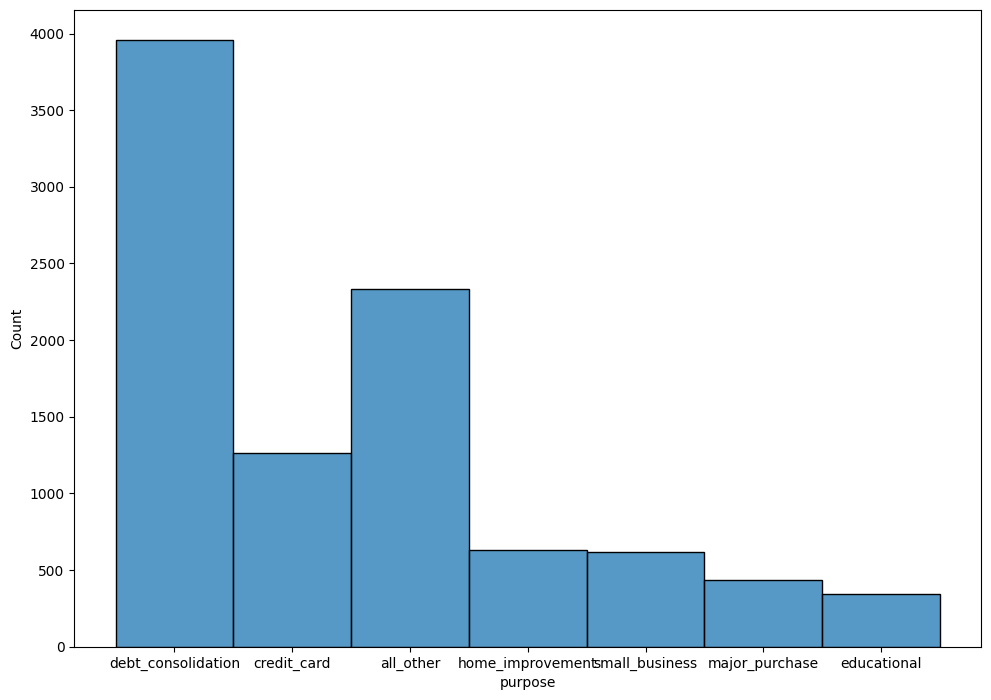

In [14]:
rcParams['figure.figsize'] = 11.7,8.27
genderPlot = sns.histplot(new_data['purpose'], bins=2, discrete=True);
genderPlot.set_xticks(data['purpose'].unique())

<Axes: >

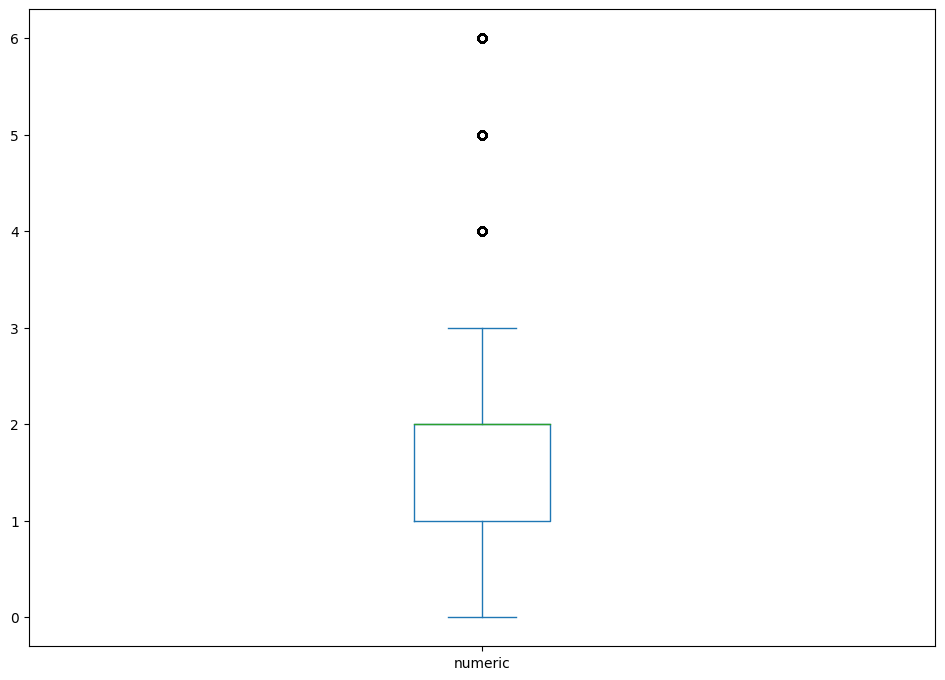

In [15]:
import matplotlib.pyplot as plt

new_data.plot(kind='box')

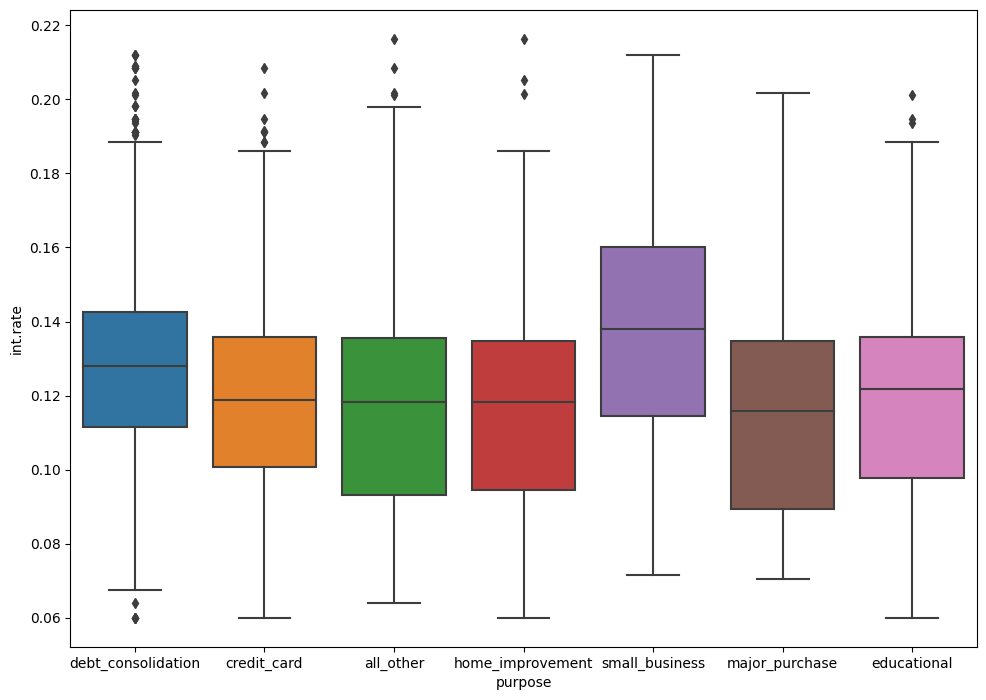

In [16]:
rcParams['figure.figsize'] = 11.7,8.27
sns.boxplot(data=data, x="purpose", y="int.rate")
plt.show()

In [17]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

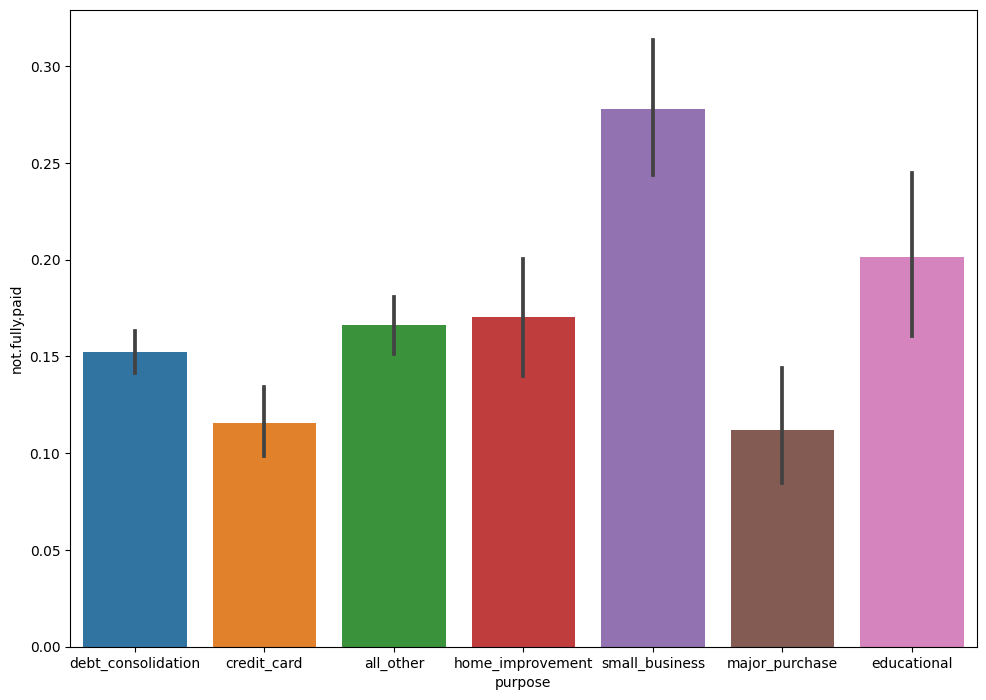

In [18]:
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(data=data, x="purpose", y="not.fully.paid")
plt.show()

In [19]:
data[(data['credit.policy'] == 1) & (data['not.fully.paid'])]['purpose']

6       debt_consolidation
7                all_other
57             credit_card
65               all_other
73          small_business
               ...        
7705      home_improvement
7706        small_business
7707             all_other
7708      home_improvement
7709        major_purchase
Name: purpose, Length: 1014, dtype: object

In [20]:
data[(data['credit.policy'] == 1) & (data['not.fully.paid'])]['purpose'].count()

1014

In [21]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pandasql import sqldf

In [23]:
print(sqldf('''select * from data LIMIT 5;'''))

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [24]:
print(sqldf('''SELECT `purpose`, COUNT(`not.fully.paid`) FROM data
where `purpose` = 'credit_card'
group by `purpose`;'''))

       purpose  COUNT(`not.fully.paid`)
0  credit_card                     1262
